# Linear Regression with one variable
-----

NOTE: Please read this notebook [here](https://nbviewer.jupyter.org/github/FG-33/ml-algorithms/blob/master/regression_analysis/linear_regression_one_variable.ipynb?flush_cache=true). It is not rendered properly on Github.

This notebook was created using the concepts and ideas conveyed in Stanford's lecture/course *Machine Learning* by Andrew Ng.

## Theory

In this version of regression analysis there's only a single independent ($x$) and a single dependent ($y$) variable. $x$ and $y$ are commonly called features/input data and labels/output data. The relationship between the two will be represented by the linear model $y = b + mx$. To lay ground for future work the vectorized form of the linear model is chosen: 

$$\begin{eqnarray}
y = x^T\theta &&&& \text{with} && x = \begin{bmatrix} 1 \\ x_1 \end{bmatrix} && \text{and} && \theta = \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix}
\tag{1}
\end{eqnarray}$$

The goal of the analysis is to determine the unknown $\theta$. The analysis consists of three parts. The first part is the necessary data. It consists of $n$ pairs of $x$ and $y$ commonly called training data. The second part is a procedure to determine whether the current model/parameters is/are a good fit with the given data . The third and last part is a procedure to actually calculate the unknown parameters based on the given data. For the second part a *cost function* is formulated and for the third part *gradient descent* is used.

#### Cost Function

The following equation represents the viability of the current parameters. The higher the *error* the worse it fits the training data: 

$$\begin{eqnarray}
J(\theta) = \frac{1}{2m} \sum_{k=1}^m(h_{\theta}(x^{(k)}) - y^{(k)})^2 &&& \text{with} &&& h_{\theta}(x) = x^T\theta
\tag{2}
\end{eqnarray}$$

The *error* $J(\theta)$ of the model is determined by calculating the estimated value which is represented by $h$ and then substracting the actual value, or ground truth, $y$ from it. This results in the *error* of a single piece of data. The error can vary in between the various $x$,$y$ pairs so the mean over the given $m$ data pairs is calculated.

#### Gradient Descent

The purpose of this algorithm is to find the minimum of a function by iteratively adjusting its parameters ($\theta$). In this case the function to minimize will be the *cost function*. Therefore the goal of the *gradient descent* algorithm is to minimize the error of the model and thus finding parameters that are a good representation of the given data pairs. The parameters $\theta$ are adjusted based on their partial derivatives:

$$\begin{eqnarray}
\theta_j^{t+1} = \theta_j^t - \alpha \frac{\partial}{\partial \theta_j} J(\theta^t)
\tag{3}
\end{eqnarray}$$

$t$ denotes the resulting parameters after $t$ iterations. $\theta^0$ is a random initialization at the start of the algorithm while $\theta^1$ contains the adjusted values after the first iteration. $j$ denotes the index of the parameter in theta. $\alpha$ is called the *learning rate*. Its purpose is to control the rate at which the parameters are adjusted in each iteration. The smaller the value the more iterations are necessary because the algorithm is used until $\theta$ converges. If $\alpha$'s too big it's also possible that $\theta$ will not converge at all.

At first the partial derivative looks intimidating, but because of the simplistic nature of linear regression with one variable the derivative for each $\theta_j$ can be easily calculated beforehand. The result looks a lot simpler:

$$\begin{eqnarray}
\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{k=1}^m (h_{\theta}(x^{(k)}) - y^{(k)}) 
\tag{4}
\end{eqnarray}$$

$$\begin{eqnarray}
\frac{\partial J(\theta)}{\partial \theta_1} = \frac{1}{m} \sum_{k=1}^m (h_{\theta}(x^{(k)}) - y^{(k)}) x_1^{(k)}
\tag{5}
\end{eqnarray}$$

Basically, the partial derivative is the cost $J$ multiplied by the corresponding input value ($\theta_1$ corresponds to $x_1$ and $\theta_0$ to $1$). 

(3), (4) and (5) combined can be written in a vectorized form:

$$\begin{eqnarray}
\theta^{t+1} = \theta^t - \frac{\alpha}{m} X^T (X \theta - \vec{y}) 
\tag{6}
\end{eqnarray}$$

The vector $\vec{y}$ contains the values for every of the $m$ data pieces. $\theta$ consists of the estimated parameters. $X$ is now a matrix. Row $j$ is the transposed $\vec{x}$ (see (7)) of the $j$-th data piece. Each row corresponds to a data pair in the training data. *Gradient descent* in which every data pair is considered in each iteration is called *batch gradient descent*. Here is an example of $X$:

$$\begin{eqnarray}
X =  \begin{bmatrix} 1 & x_0 \\ 1 & x_1 \\ 1 & x_2 \\ 1 & x_3 \end{bmatrix}
\tag{7}
\end{eqnarray}$$

-----

## The Implementation

In [1]:
import numpy as np

def h(x, theta):
    """ Calculate the estimated values.
    
    :param x: input data, feature matrix
    :param theta: the estimated linear model's parameters
    :return estimated values: estimated values based on the given model parameters theta
    """
    return np.matmul(x, theta)

def compute_costs(x, y, theta):
    """ Calculates the squared error between ground truth y and predicted output y'

    :param x: input data, feature matrix
    :param y: output data, ground truth
    :param theta: the estimated linear model's parameters
    :return error: squared error of the estimated model
    """
    N = y.shape[0] # number of samples
    return 1/(2 * N) * sum(np.power(h(x, theta) - y, 2)) # vectorized form of (2)

def gradient_descent(x, y, theta, alpha=0.01, num_iters=100):
    """ Performs gradient descent to determine the best possible model based on given input data (x)
        and output data (y)

    :param x: input data, feature matrix
    :param y: output data, ground truth
    :param theta: initial linear model's parameters
    :param alpha: learning rate
    :param num_iters: number of iterations to run gradient descent
    :return theta: estimated linear model's parameters
    :return costs: list containing the calculated cost for each iteration
    """
    m, n = x.shape
    costs = []
    
    # also calculate for first iteration    
    costs.append(compute_costs(x, y, theta)) 
    
    for i in range(num_iters):
        # adjust theta
        theta -= alpha * (1 / m) * np.matmul(np.transpose(x), (np.matmul(x, theta) - y)) # see (7)
        # calculate cost for current iter
        costs.append(compute_costs(x, y, theta))

    return theta, costs

## The Data

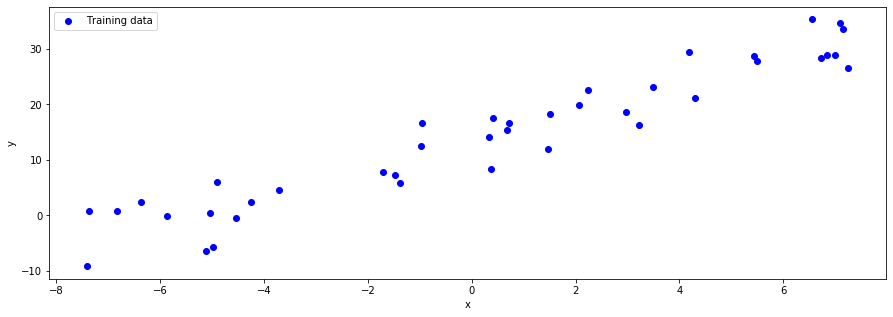

In [2]:
# Generates y values given x to demonstrate linear regression analysis
def generate_data(x):
    noise = np.random.random_sample((x.shape[0], 1)) * 15 - 7.5
    return 2.5 * x + 13 + noise # basically y = \theta_1 * x + theta_0 with noise added

# Generate data
np.random.seed(4)
x = np.random.random_sample((40,1)) * 15 - 7.5
y = generate_data(x)

# Add ones column
x = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)

# Plot data points
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(1, figsize=(15, 5))
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x[:,0], y, "bo")
plt.legend(["Training data"])
plt.show()

## Regression Analysis

[[ 2.49547155]
 [13.29556962]]


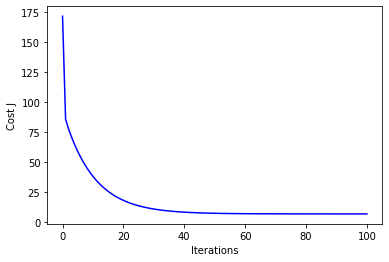

In [3]:
# Execute gradient descent
theta = np.random.rand(x.shape[1], 1)
theta, costs = gradient_descent(x, y, theta, alpha=0.05, num_iters=100)
print(theta)

# Plot the costs during gradient descent
plt.figure(1)
plt.plot(range(len(costs)), costs, "b-")
plt.xlabel("Iterations")
plt.ylabel("Cost J")
plt.show()

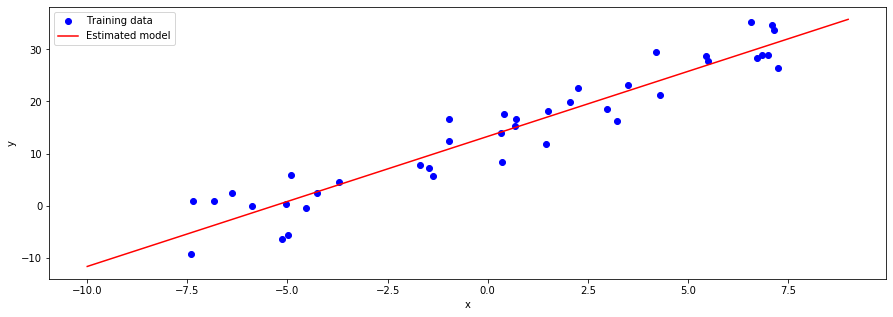

In [4]:
# Plot the training data x, y
plt.figure(1, figsize=(15, 5))
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x[:,0], y, "bo") # data

# Create data to present the estimated model
x_ = np.arange(-10,10).reshape(-1, 1)
x_ = np.concatenate((x_, np.ones((x_.shape[0], 1))), axis=1)

# Plot the estimated model
plt.plot(x_[:,0], h(x_, theta), "r-")
plt.legend(["Training data", "Estimated model"])
plt.show()

The values for $\theta$ are pretty close to the original function's parameters. Overall, it looks like the model fits the data points.